# train 1k와 test 1k <- SVM

In [1]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

In [2]:
import pandas as pd
train = pd.read_csv('../data/train_1k.csv', header=None)
test = pd.read_csv('../data/test_1k.csv', header=None)

In [3]:
train.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
train[0].describe()

count    1001.000000
mean        4.447552
std         2.883313
min         0.000000
25%         2.000000
50%         4.000000
75%         7.000000
max         9.000000
Name: 0, dtype: float64

In [5]:
# train[0]의 숫자 빈도
train[0].value_counts()

7    117
1    116
4    105
9    100
2     99
0     98
6     94
3     93
5     92
8     87
Name: 0, dtype: int64

In [6]:
train_data = train.drop(0, axis=1)
# train.loc[:,train.columns != 0]
train_data.head()

,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
train_label = train[0]
train_label.head()

0    5
1    0
2    4
3    1
4    9
Name: 0, dtype: int64

In [8]:
# train data의 내용 보기
import numpy as np

temp = np.array(train.loc[0, train.columns != 0])
temp

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

> 숫자가 큰 곳일수록 진한 칸


In [9]:
tempColumns = []
temp1 = temp.reshape(28, 28)
count = 0

for i in range(0,29):
    if i % 2 == 1:
        for j in range(0,29):
            if j % 2 == 1:
                tempColumns.append(temp1[i,j])
                count += 1
count

196

In [10]:
np.sqrt(196)

14.0

In [11]:
print(np.array(tempColumns).reshape(14,14))

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  18  18 136  26 255 127   0   0]
 [  0   0   0  49 253 253 253 253 251  82  56   0   0   0]
 [  0   0   0   0 156 253 205   0 154   0   0   0   0   0]
 [  0   0   0   0   0 139 190   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 241 160   1   0   0   0   0   0]
 [  0   0   0   0   0   0   0 186 253  27   0   0   0   0]
 [  0   0   0   0   0   0   0   0 249 249   0   0   0   0]
 [  0   0   0   0   0   0 148 253 253 182   0   0   0   0]
 [  0   0   0   0  66 253 253 198   2   0   0   0   0   0]
 [  0   0 172 253 253 244  11   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0]]


In [12]:
test_data = test.loc[:,train.columns != 0]
test_label = test.loc[:,train.columns == 0]

In [13]:
test_data.head()

,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
test_label.head()

,0
0,7
1,2
2,1
3,0
4,4


In [15]:
# 학습하기
from sklearn import svm
svm_clf = svm.SVC()
svm_clf.fit(train_data, train_label)

SVC()

In [16]:
svm_clf.score(test_data, test_label)

0.8751248751248751

In [17]:
from sklearn.model_selection import cross_val_score

---

In [18]:
scores = cross_val_score(svm_clf, train_data, train_label, cv=13)
print('각각의 정답률 :', scores)

각각의 정답률 : [0.93506494 0.93506494 0.93506494 0.84415584 0.90909091 0.90909091
 0.93506494 0.88311688 0.96103896 0.88311688 0.87012987 0.90909091
 0.92207792]


In [19]:
print('평균 정답률 :', scores.mean())

평균 정답률 : 0.91008991008991


---
### traing 1k와 test 1k <- SVM, Log

In [21]:
train_data.head()

,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
test_data.head()

,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
len(train_data)

1001

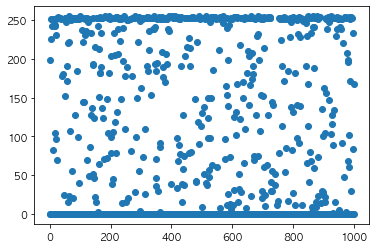

In [24]:
plt.scatter(train_data.index, train_data[300])
plt.show()

### 로그변환 이유
로그는 태생적으로 큰 값을 작게 표기하기 위해서 고안된 방법,   
측정단위를 키우는 것만으로는 해결하지 못한 부분을 해결해준다.

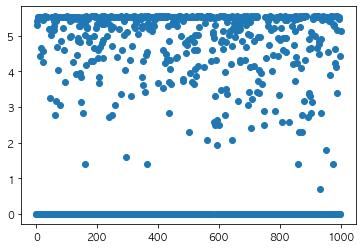

In [25]:
plt.scatter(train_data.index, np.log1p(train_data[300]))
plt.show()

### np.log1p
기본적으로 log 안의 x 값은 양수만 가능하다.   
하지만 0에 가까운 아주 작은 양수(0.00000001)에 log를 적용하면,   
음의 무한대(-inf)에 가까워지게 된다.   
이를 방지하기 위해 1을 더함으로써 0보다 큰 양수의 값을 갖게된다.   

In [30]:
# Data 표준화
train_data = pd.DataFrame(np.log1p(train_data))
train_data.head()

,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
test_data = pd.DataFrame(np.log1p(test_data))
test_data.head()

,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
# 학습하기
clf = svm.SVC()

clf.fit(train_data, train_label)

SVC()

In [37]:
clf.score(test_data, test_label)

0.8901098901098901

> test와 train data가 1대1 비율인데 90프로정도면 매우 높은 점수이다.

In [52]:
train_10k_label = pd.read_csv('../data/train_10k.csv', header=None)[0]
train_10k_data = pd.read_csv('../data/train_10k.csv', header=None).iloc[:,1:]
train_10k_data.head()

,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
train_20k_label = pd.read_csv('../data/train_20k.csv', header=None)[0]
train_20k_data = pd.read_csv('../data/train_20k.csv', header=None).iloc[:,1:]
train_20k_data.head()

,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
train_10k_data.shape

(10000, 784)

In [55]:
train_10k_label.shape

(10000,)

In [56]:
clf.fit(train_10k_data, train_10k_label)

SVC()

In [57]:
clf.score(test_data, test_label)

0.08691308691308691

In [58]:
clf.fit(train_20k_data, train_20k_label)

SVC()

In [59]:
clf.score(test_data, test_label)

0.2097902097902098

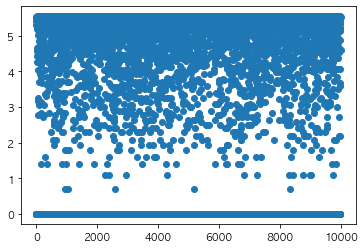

In [61]:
plt.scatter(train_10k_data.index, np.log1p(train_10k_data)[300])
plt.show()

In [64]:
clf.fit(np.log1p(train_10k_data), train_10k_label)

SVC()

In [65]:
clf.score(test_data, test_label)

0.958041958041958

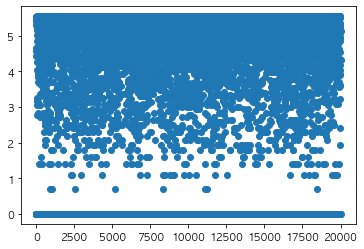

In [63]:
plt.scatter(train_20k_data.index, np.log1p(train_20k_data)[300])
plt.show()

In [66]:
clf.fit(np.log1p(train_20k_data), train_20k_label)

SVC()

In [67]:
clf.score(test_data, test_label)

0.965034965034965